In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.shape

(6435, 8)

### checking null percentage

In [6]:
data.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

### checking for duplicates

In [7]:
data.duplicated().sum()

0

### sorting the dataframe based on the date

In [8]:
data.sort_values(by='Date',inplace=True)
data.reset_index(drop=True,inplace=True)

##### Here, the given temperature value is in farrenheat scale . we have to change this to celsius scale

In [9]:
data['Celsius'] = [(temp - 32)*(5/9) for temp in data.Temperature]

In [10]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Celsius
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,21.722222
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,15.383333
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,30.005556
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,33.027778
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,23.700000


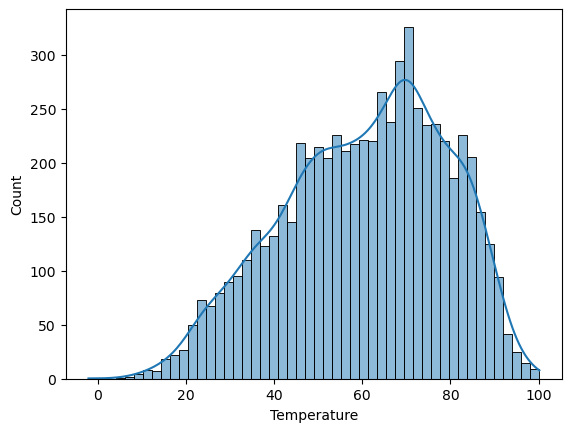

In [11]:
sns.histplot(data=data,kde= True, x = 'Temperature',bins=50)
plt.show()

#### Removing column named Temperature

In [12]:
data.drop(columns=('Temperature'),inplace=True)

#### Finding the maximum ,minimum and mode value to cut the df into 2 parts

In [13]:
data.Celsius.max()

37.855555555555554

In [14]:
data.Celsius.min()

-18.922222222222224

In [15]:
data.Celsius.mean()

15.924323577656914

In [16]:
data['Heat_level'] = pd.cut(x=data.Celsius,bins=[-20,16,40],labels=['Cold','Warm'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm


### Univariate analysis

##### Histogram

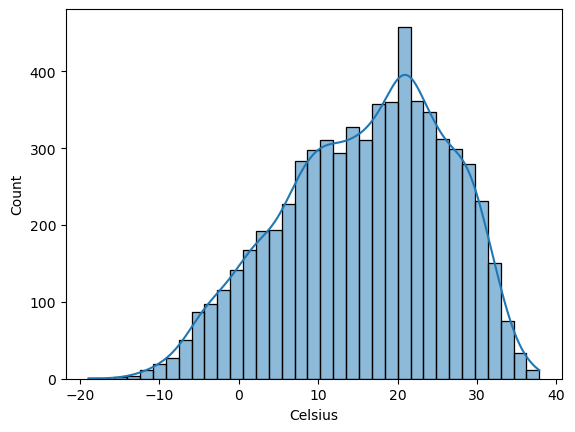

In [17]:
sns.histplot(data=data, x='Celsius',kde=True)
plt.show()

In [18]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Celsius', 'Heat_level'],
      dtype='object')

### Box plots

#### Box plot based on columns we are selected

In [19]:
columns = ['Weekly_Sales', 'Fuel_Price', 'CPI',
       'Unemployment', 'Celsius']

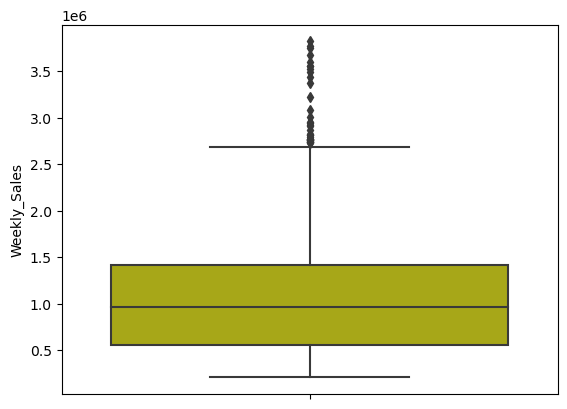

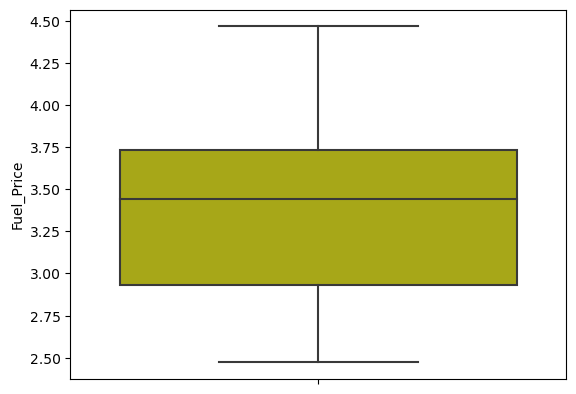

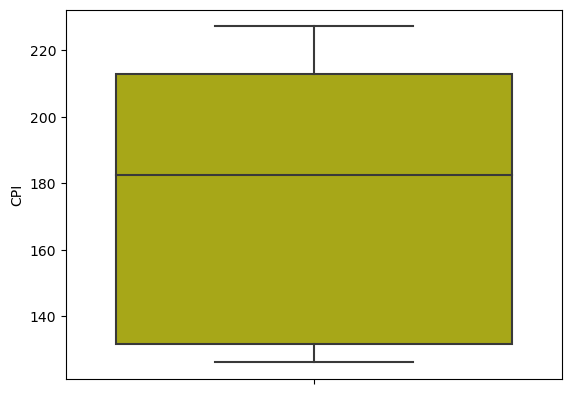

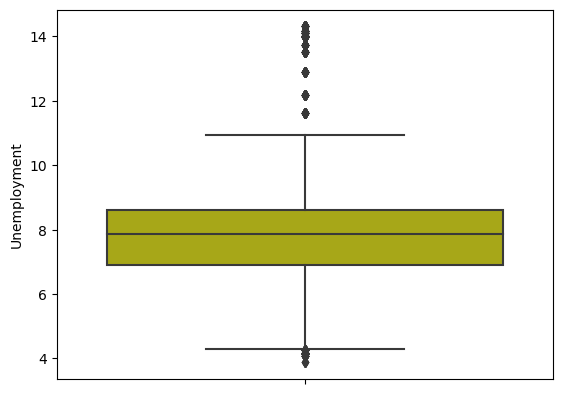

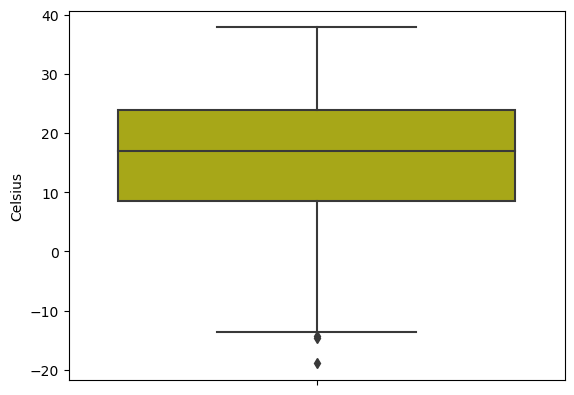

In [20]:
for i in columns:
    sns.boxplot(y = data[i] ,data=data, color = 'y')
    plt.show()

#### Assigninging colurs to individual columns

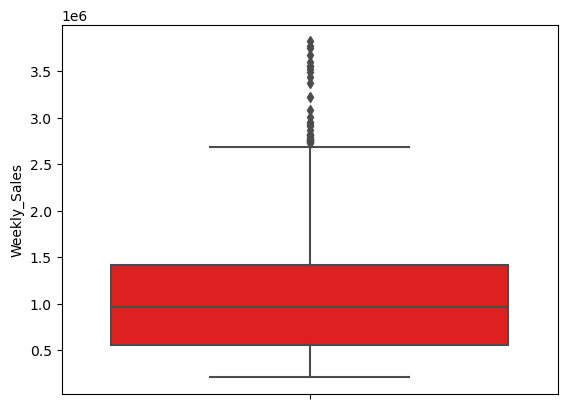

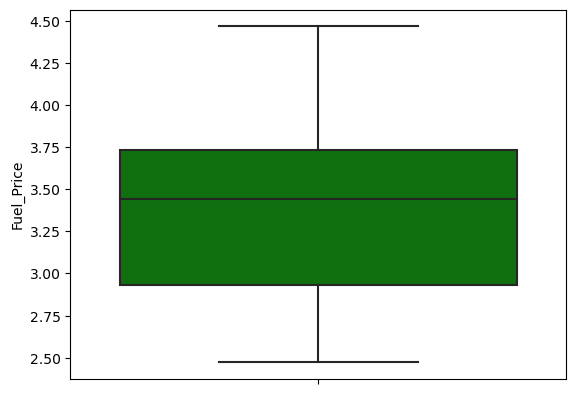

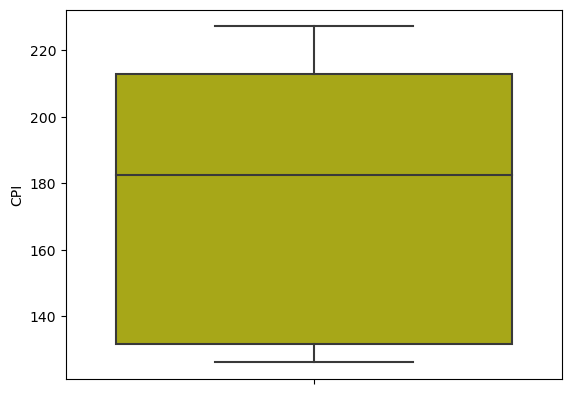

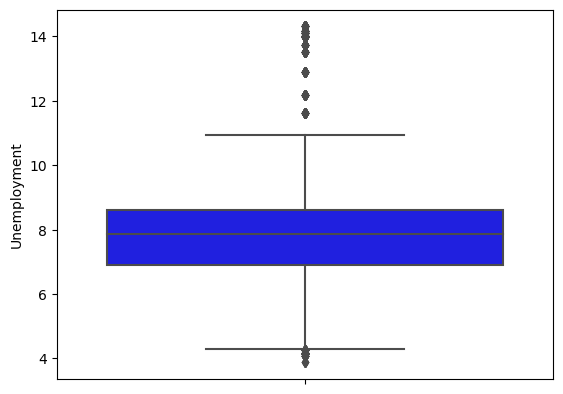

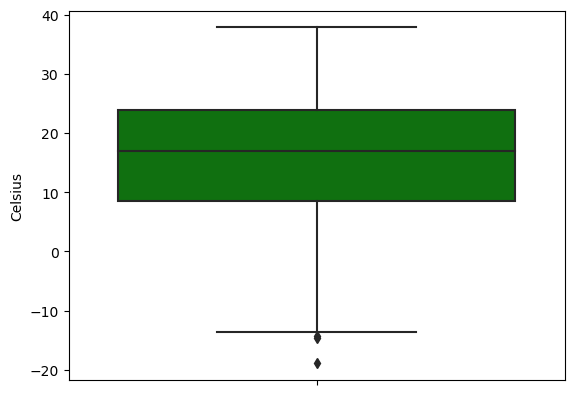

In [21]:
colors = ['r','g','y','b','g']
for i in range (len(columns)):
    for j in range(len(colors)):
        if i == j:
            sns.boxplot(y = data[columns[i]] ,data=data, color = colors[j])
    plt.show()

### Count plot

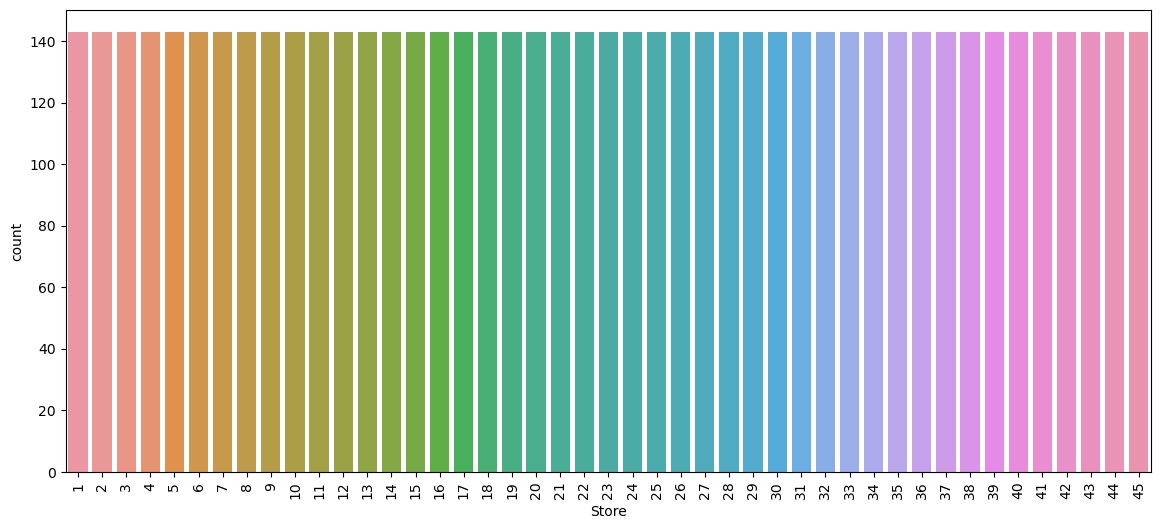

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(x='Store',data=data)
plt.xticks(rotation=90)
plt.show()

##### Here from this countplot we can find a uniform graph.which means we can find equal number of reports from each Stores

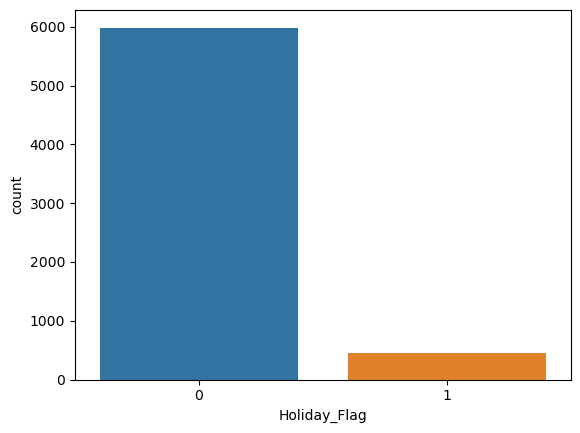

In [23]:
sns.countplot(x='Holiday_Flag',data=data)
plt.show()

In [24]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Week_day'] = data.Date.dt.weekday
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level,Year,Month,Day,Week_day
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm,2010,1,10,6
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold,2010,1,10,6
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm,2010,1,10,6
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm,2010,1,10,6
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm,2010,1,10,6


### Replacing the names of month and week

In [25]:
data['Month'] = data.Month.replace({1:'Januvary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [26]:
data['Week_day'] = data.Week_day.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesdday',4:'Thursday',5:'Friday',6:'Saturday'})

In [27]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level,Year,Month,Day,Week_day
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm,2010,Januvary,10,Saturday
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold,2010,Januvary,10,Saturday
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm,2010,Januvary,10,Saturday
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm,2010,Januvary,10,Saturday
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm,2010,Januvary,10,Saturday


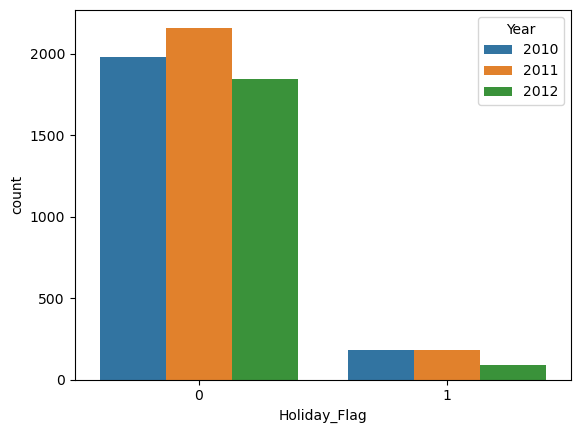

In [28]:
sns.countplot(x='Holiday_Flag',hue='Year',data=data)
plt.show()

#### From this graph we can find that this graph contains more values of the year 2023

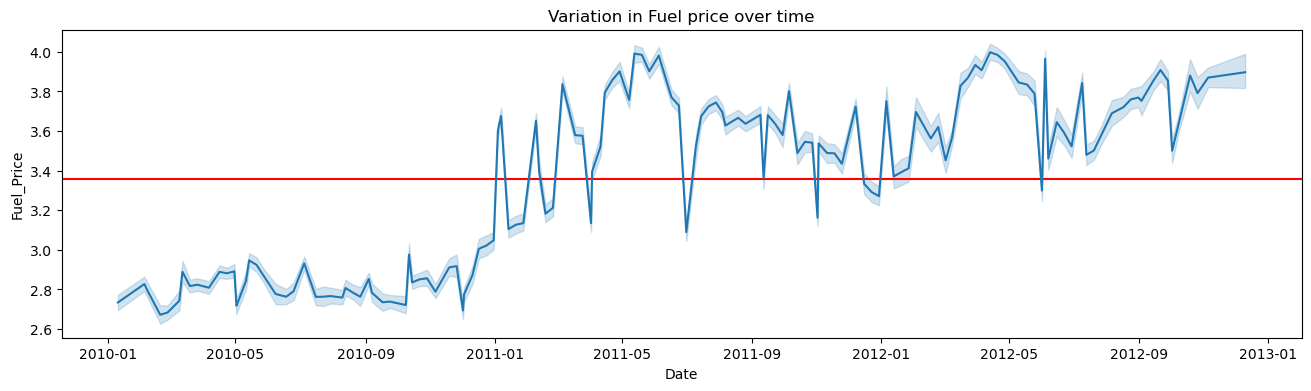

In [29]:
plt.figure(figsize=(16,4))
plt.axhline(y= data.Fuel_Price.mean(),color='r')
sns.lineplot(x='Date',y='Fuel_Price',data=data)
plt.title('Variation in Fuel price over time')
plt.show()

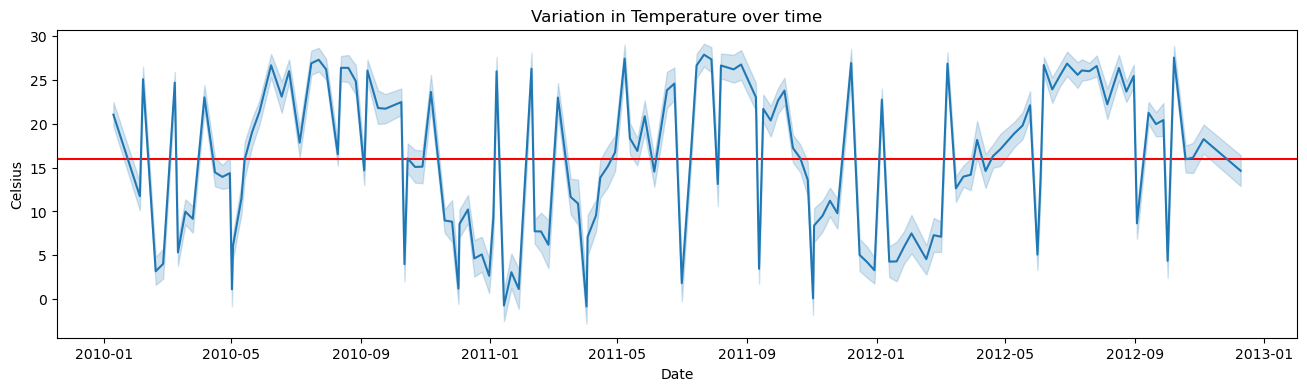

In [30]:
plt.figure(figsize=(16,4))
plt.axhline(y= data.Celsius.mean(),color='r')
sns.lineplot(x='Date',y='Celsius',data=data)
plt.title('Variation in Temperature over time')
plt.show()

### Scatter plot

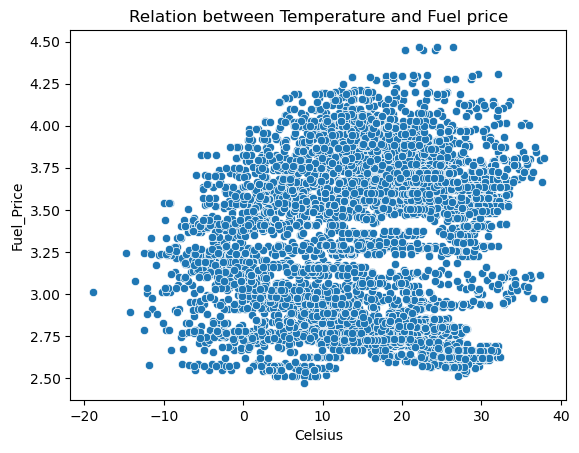

In [31]:
sns.scatterplot(x='Celsius',y='Fuel_Price',data=data)
plt.title('Relation between Temperature and Fuel price')
plt.show()

### Reg plot

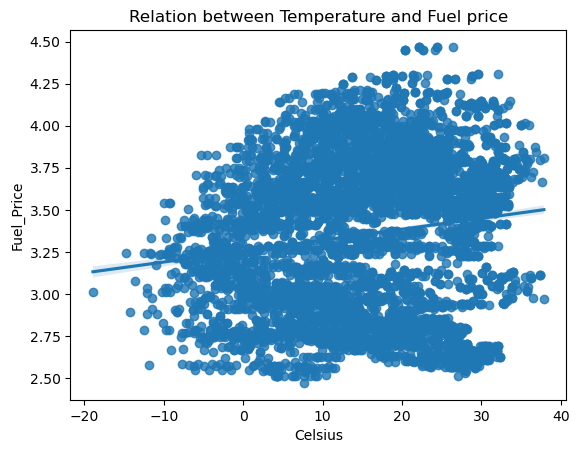

In [32]:
sns.regplot(x='Celsius',y='Fuel_Price',data=data)
plt.title('Relation between Temperature and Fuel price')
plt.show()

##### This graph shows a weak positive correlation

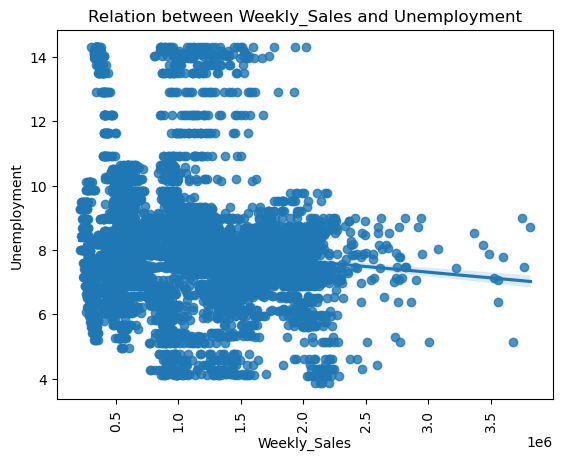

In [33]:
plt.xticks(rotation=90)
sns.regplot(data=data,x='Weekly_Sales',y='Unemployment')
plt.title('Relation between Weekly_Sales and Unemployment')
plt.show()

In [34]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level,Year,Month,Day,Week_day
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm,2010,Januvary,10,Saturday
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold,2010,Januvary,10,Saturday
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm,2010,Januvary,10,Saturday
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm,2010,Januvary,10,Saturday
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm,2010,Januvary,10,Saturday


##### This graph shows a weak negative correlation

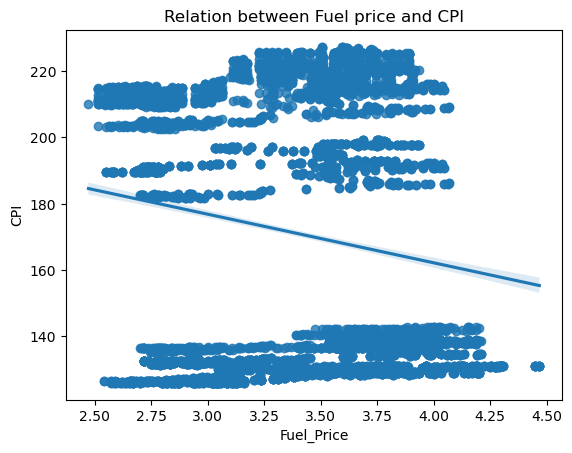

In [35]:
sns.regplot(x='Fuel_Price',y='CPI',data=data)
plt.title('Relation between Fuel price and CPI')
plt.show()

### Pie chart

In [36]:
Holyday_sales = data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()
Holyday_sales

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

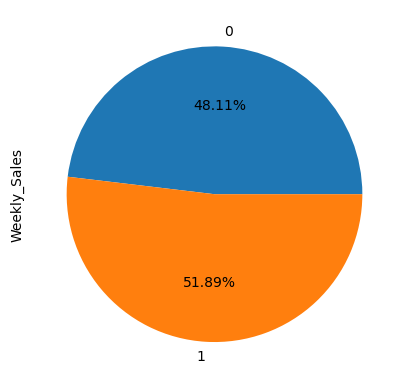

In [37]:
Holyday_sales.plot.pie(autopct='%0.2f%%');

In [39]:
"""palette_color=sns.color_palette('bright')
plt.pie(data=Holyday_sales,labels = [0,1],autopct='%1.2f%%')
plt.show()"""

"palette_color=sns.color_palette('bright')\nplt.pie(data=Holyday_sales,labels = [0,1],autopct='%1.2f%%')\nplt.show()"

### Bar plots

In [40]:
Store_sales = data.groupby(['Store'])['Weekly_Sales'].sum()

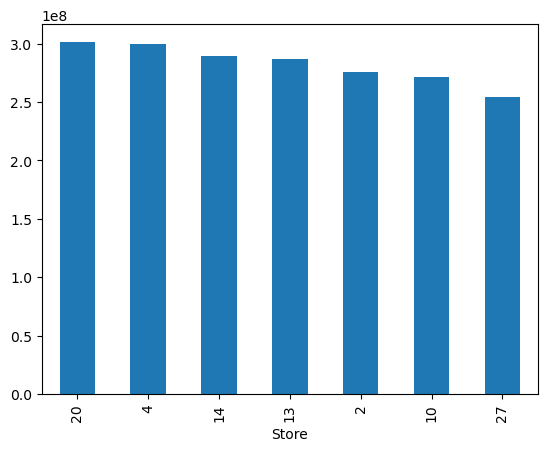

In [41]:
Store_sales.nlargest(7).plot.bar();

##### This shows the graph of 7 stores with highest sale rate per week and their progressive levels

In [43]:
Year_Sales = data.groupby(['Year'])['Weekly_Sales'].sum()

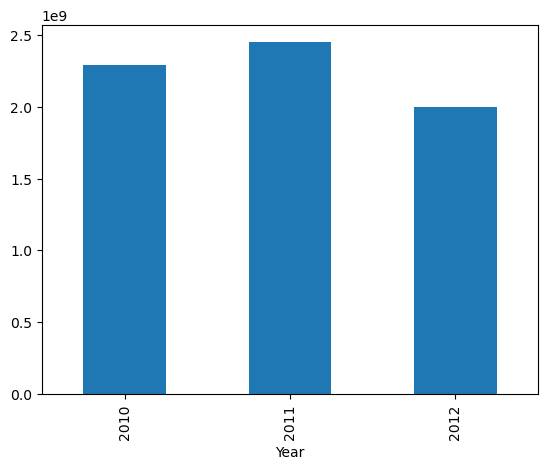

In [45]:
Year_Sales.plot.bar();

##### from this graph, we can find that in the year 2011 has more sales than 2 other years 

### Explode pie chart

In [47]:
Year_unemployment = data.groupby(['Year'])['Unemployment'].mean()

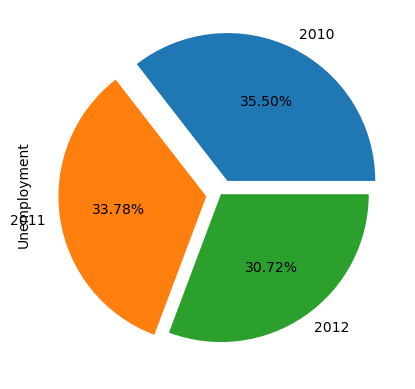

In [51]:
Year_unemployment.plot.pie(autopct='%0.2f%%',explode =[0.1,0.1,0]);

##### from this graph we can find that the unemployment is higher in the year 2010 and lesser at 2012

### Adding color in bar chart

In [53]:
Yearly_holiday = data.groupby(['Year'])['Holiday_Flag'].sum()

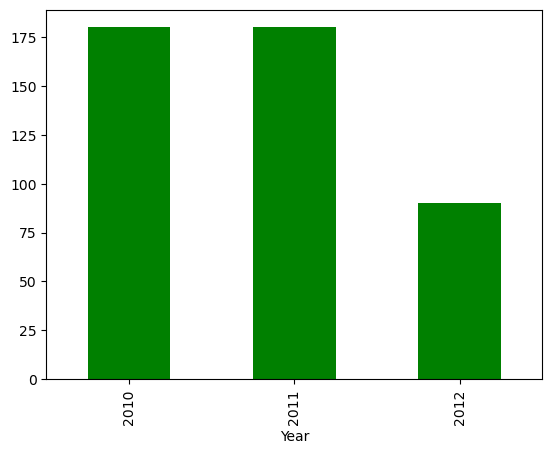

In [54]:
Yearly_holiday.plot.bar(color = 'g');

##### here, we can find that in the year 2012 , there are less number of holidays than other 2 years

In [55]:
Year_CPI = data.groupby(['Year'])['CPI'].mean()

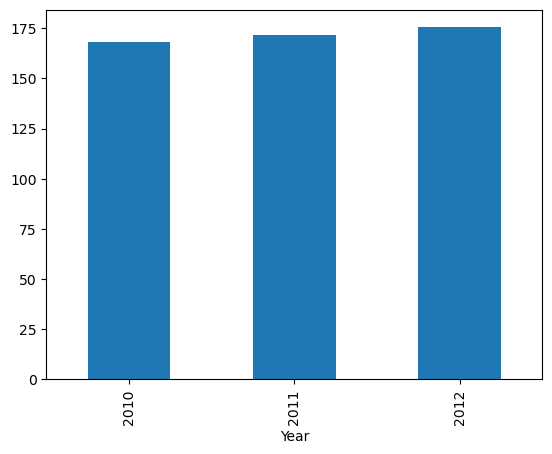

In [57]:
Year_CPI.plot.bar();

##### we can find that from 2010 onwards there is a slight increase of CPI on every years till 2012

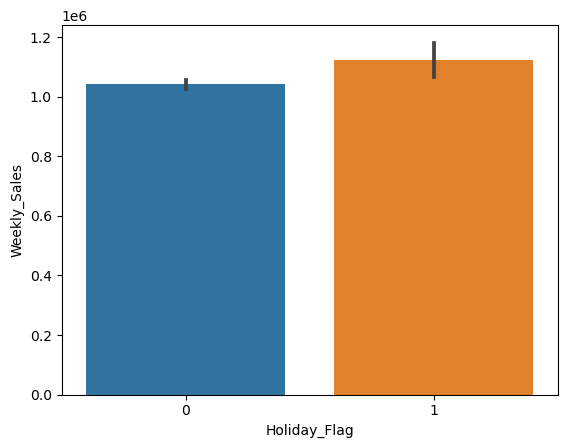

In [59]:
sns.barplot(x ='Holiday_Flag',y='Weekly_Sales',data=data );

##### from this bar plot we can find that the average weekly sales value of holyday is slightly higher compared to the non - holiday days

In [58]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level,Year,Month,Day,Week_day
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm,2010,Januvary,10,Saturday
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold,2010,Januvary,10,Saturday
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm,2010,Januvary,10,Saturday
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm,2010,Januvary,10,Saturday
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm,2010,Januvary,10,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,3.760,199.053937,6.195,4.100000,Cold,2012,December,10,Sunday
6431,16,2012-12-10,491817.19,0,3.760,199.053937,5.847,6.255556,Cold,2012,December,10,Sunday
6432,10,2012-12-10,1713889.11,0,4.468,131.108333,6.943,24.461111,Warm,2012,December,10,Sunday
6433,25,2012-12-10,697317.41,0,4.000,216.115057,7.293,6.522222,Cold,2012,December,10,Sunday


### Querying the data by each years

In [60]:
Year_2010 = data[data.Year == 2010]
Year_2011 = data[data.Year == 2011]
Year_2012 = data[data.Year==2012]

#### Droping the year column

In [61]:
Year_2010.drop(columns='Year',inplace=True)
Year_2011.drop(columns='Year',inplace=True)
Year_2012.drop(columns='Year',inplace=True)

#### ploting lineplot using subplots

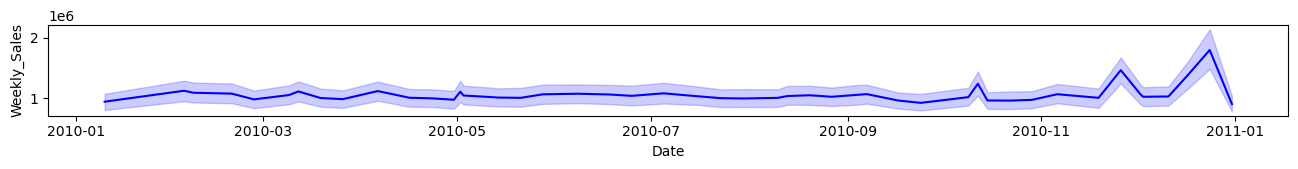

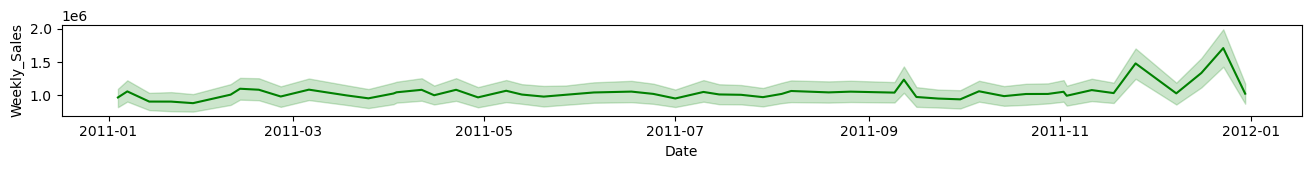

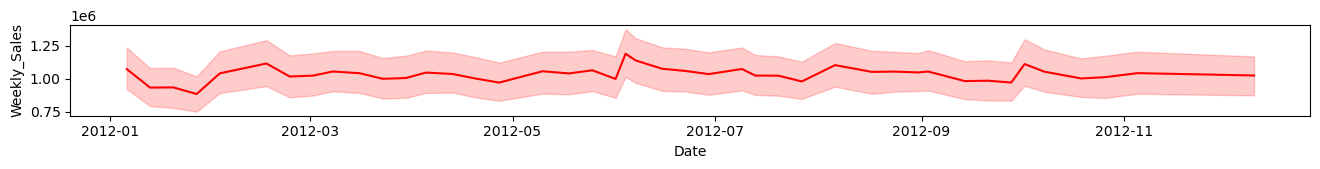

In [67]:
plt.figure(figsize=(16,4))
plt.subplot(3,1,1)
sns.lineplot(x='Date',y='Weekly_Sales',data=Year_2010,color='b')

plt.figure(figsize=(16,4))
plt.subplot(3,1,2)
sns.lineplot(x='Date',y='Weekly_Sales',data=Year_2011,color='g')

plt.figure(figsize=(16,4))
plt.subplot(3,1,3)
sns.lineplot(x='Date',y='Weekly_Sales',data=Year_2012,color='r')
plt.show()

##### from this graph we can identify that the months novemer and december has more sales than other months.but,only 2012 has differences from other 2 years

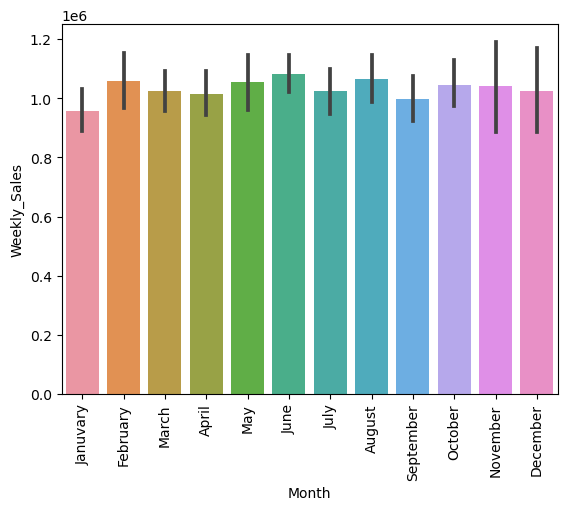

In [69]:
plt.xticks(rotation=90)
sns.barplot(x='Month',y='Weekly_Sales',data=Year_2012);

##### here we found that in 2012 more sales are found in the month june

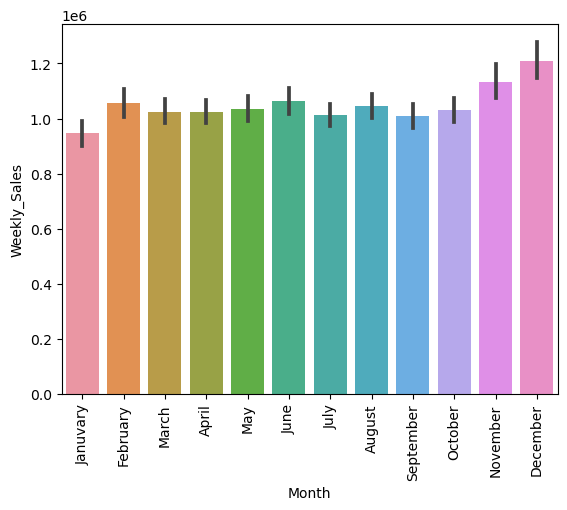

In [64]:
plt.xticks(rotation=90)
sns.barplot(x='Month',y='Weekly_Sales',data=data);

##### from this graph we can conform our previous findings that november and december has more sales than other months

### Yearly sale from each stores

In [71]:
Yearly_sales_store = data.groupby(['Store','Year'])['Weekly_Sales'].sum()
Yearly_sales_store

Store  Year
1      2010    73278832.00
       2011    80921918.83
       2012    68202058.02
2      2010    95277864.19
       2011    98607881.42
                  ...     
44     2011    15498194.67
       2012    14187373.72
45     2010    38536343.37
       2011    41135367.88
       2012    32723630.17
Name: Weekly_Sales, Length: 135, dtype: float64

#### changing the groupby value as dataframe

In [75]:
Yearly_sales_store = Yearly_sales_store.reset_index()

In [76]:
Yearly_sales_store

,Store,Year,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42
...,...,...,...
130,44,2011,15498194.67
131,44,2012,14187373.72
132,45,2010,38536343.37
133,45,2011,41135367.88


In [77]:
Yearly_sales_store.nlargest(5,'Weekly_Sales')

,Store,Year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08


In [82]:
Yearly_Sale_Store_2010 = Yearly_sales_store[Yearly_sales_store.Year == 2010]
Yearly_sale_store_2011 = Yearly_sales_store[Yearly_sales_store.Year==2011]
Yearly_sale_store_2012 = Yearly_sales_store[Yearly_sales_store.Year==2012]

#### Assigng title & label of x and y axis

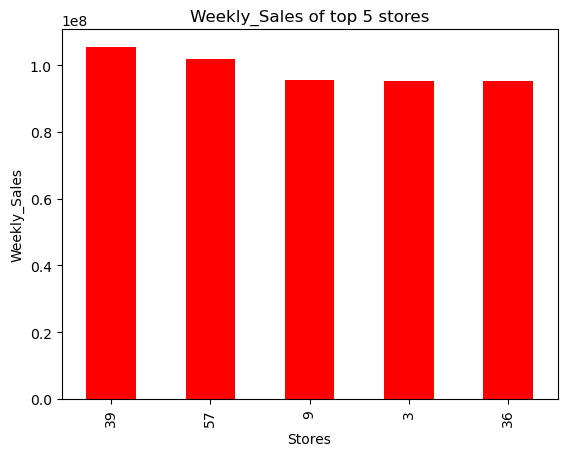

In [93]:
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_Sales of top 5 stores')
Yearly_Sale_Store_2010.Weekly_Sales.nlargest(5).plot.bar(color ='r');

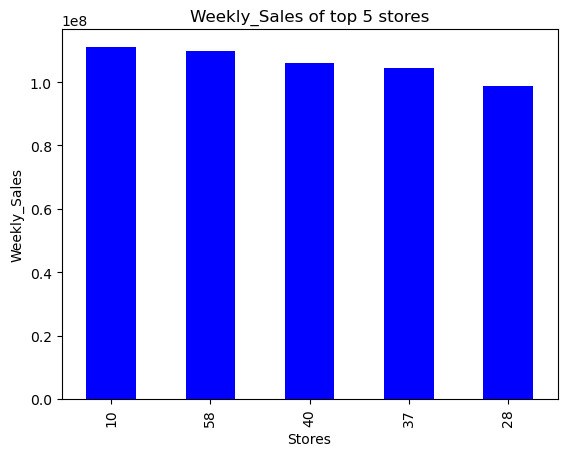

In [94]:
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_Sales of top 5 stores')
Yearly_sale_store_2011.Weekly_Sales.nlargest(5).plot.bar(color ='b');

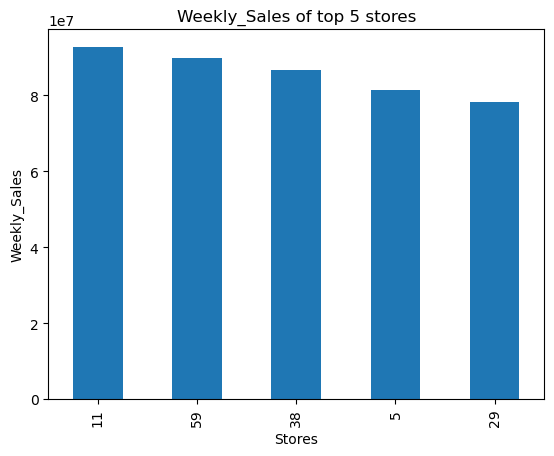

In [95]:
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_Sales of top 5 stores')
Yearly_sale_store_2012.Weekly_Sales.nlargest(5).plot.bar();

##### from this graph we can identify that the top 5 stores who has more weekly sales from each years are distinct

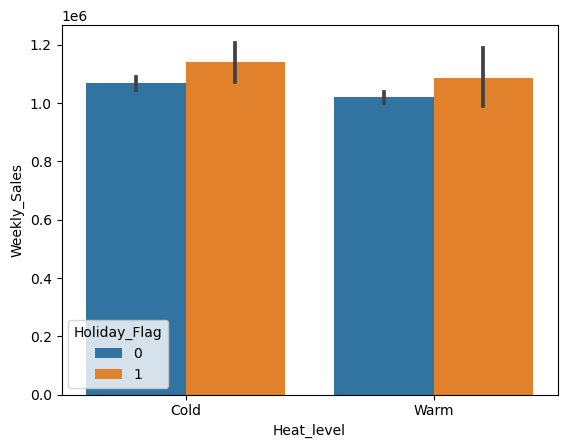

In [91]:
sns.barplot(x='Heat_level',y='Weekly_Sales',hue='Holiday_Flag',data=data)
plt.show()

##### Here we can clearly identify that the weather condition is not affecting the sales amount and holidays have more sales than other days

### Heatmap of a single column

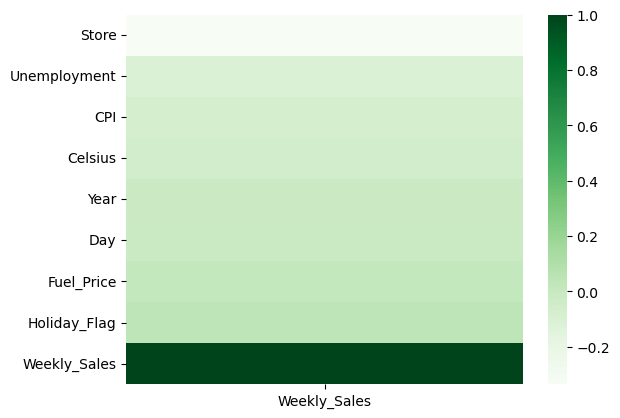

In [99]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=True),cmap='Greens');

### Plotting from pivot table

In [101]:
Monthly_Sales = pd.pivot_table(data=data,values = 'Weekly_Sales',index ='Month',columns='Year')

In [102]:
Monthly_Sales 

Year,2010,2011,2012
Month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.198413e+06,1.274311e+06,1.025078e+06
February,1.064372e+06,1.042273e+06,1.057997e+06
Januvary,9.386639e+05,9.420697e+05,9.567817e+05
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06


##### pivot table shows the values of a column as values

In [105]:
Month_year_cross =pd.crosstab(data.Month,data.Year)
Month_year_cross

Year,2010,2011,2012
Month,,,
April,180,270,180
August,180,180,180
December,270,180,45
February,180,180,135
Januvary,45,225,180
July,180,225,180
June,135,135,270
March,180,135,225
May,270,180,135


##### crosstab shows count of values which satisfy both x and y label as values

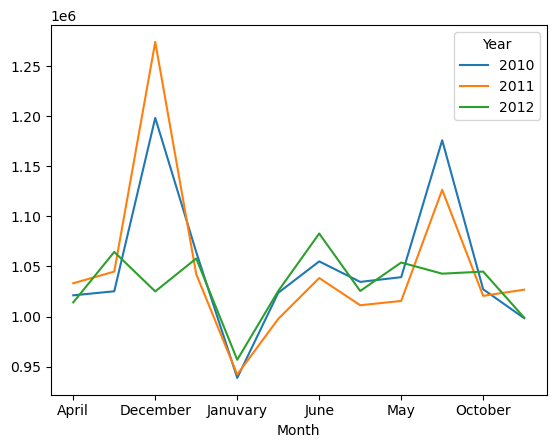

In [104]:
Monthly_Sales.plot();